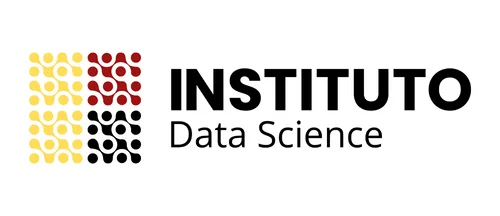 https://institutodatascience.org/

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

plt.style.use('ggplot')
%matplotlib inline

## usaremos los datos abiertos de CABA, a partir de un relevamiento muestral de los avisos publicados para la venta de departamentos en el año 2020.

https://data.buenosaires.gob.ar/dataset/terrenos-valor-oferta

In [35]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [36]:
df = pd.read_csv("https://cdn.buenosaires.gob.ar/datosabiertos/datasets/secretaria-de-desarrollo-urbano/terrenos-valor-oferta/Terrenos-en-venta-2020.csv", encoding = "latin1", sep=",")

In [37]:
df.head()

,DIRECCION,PROPIEDADS,PRECIOUSD,PRECIOPESO,DOLARM2,PESOSM2,COTIZACION,TRIMESTRE_,BARRIO,COMUNA_
0,RIVADAVIA 3500,190,150000,12000000,790,63158,80,CUARTO,ALMAGRO,5
1,PRINGLES 100,242,230000,18400000,950,76033,80,CUARTO,ALMAGRO,5
2,"PERON, JUAN DOMINGO, TTE. 3400",211,265000,21200000,1256,100474,80,CUARTO,ALMAGRO,5
3,MEXICO 4000,320,300000,24000000,938,75000,80,CUARTO,ALMAGRO,5
4,VENEZUELA 4067,250,305000,24400000,1220,97600,80,CUARTO,ALMAGRO,5


Hacer un primer análisis del dataset y analizar nulos.

In [38]:
filas_antes = df.shape[0]
df = df.dropna()
filas_despues = df.shape[0]
print(f"Filas eliminadas: {filas_antes - filas_despues}")
print(df.isnull().sum())          # Nulos por columna
print(df.isnull().sum().sum())    # Nulos totales en el DF

Filas eliminadas: 6
DIRECCION     0
PROPIEDADS    0
PRECIOUSD     0
PRECIOPESO    0
DOLARM2       0
PESOSM2       0
COTIZACION    0
TRIMESTRE_    0
BARRIO        0
COMUNA_       0
dtype: int64
0


Sabemos que tenemos direcciones nulas. Luego al utilizar esa columna lo vamos a tener que tener en cuenta.

In [ ]:
import plotly.express as px
import ipywidgets as widgets
from IPython.display import display

# Lista de columnas numéricas para elegir
columnas_numericas = ['PRECIOUSD', 'PRECIOPESO', 'DOLARM2', 'PESOSM2']

# Dropdown interactivo
dropdown = widgets.Dropdown(
    options=columnas_numericas,
    description='Columna:',
    value='PRECIOPESO'
)

# Función que genera el histograma
def actualizar_histograma(columna):
    fig = px.histogram(df, x=columna, nbins=50, title=f'Histograma de {columna}')
    fig.show()

# Conexión del dropdown con la función
widgets.interact(actualizar_histograma, columna=dropdown)


interactive(children=(Dropdown(description='Columna:', index=1, options=('PRECIOUSD', 'PRECIOPESO', 'DOLARM2',…

<function __main__.actualizar_histograma(columna)>

Los trimestres aparecen como strings. En ese caso puedo hacer un value_counts() o reemplazar los valores por números para ver el histograma de esa columna.

In [ ]:
#verificar el trimestre con la funcion unique
df
df["TRIMESTRE_"].unique()

array(['CUARTO', 'PRIMER', 'SEGUNDO', 'TERCER'], dtype=object)

In [54]:
df = pd.read_csv("https://cdn.buenosaires.gob.ar/datosabiertos/datasets/secretaria-de-desarrollo-urbano/terrenos-valor-oferta/Terrenos-en-venta-2020.csv", encoding = "latin1", sep=",")
# hacer el remplazo por numeros
df["TRIMESTRE_"] = df["TRIMESTRE_"].map({"PRIMER": "1", "SEGUNDO": "2", "TERCER": "3", "CUARTO": "4"})  # Mapea valores para reemplazo

In [55]:
#hacer un head del nuevo df
df.head()

,DIRECCION,PROPIEDADS,PRECIOUSD,PRECIOPESO,DOLARM2,PESOSM2,COTIZACION,TRIMESTRE_,BARRIO,COMUNA_
0,RIVADAVIA 3500,190,150000,12000000,790,63158,80,4,ALMAGRO,5
1,PRINGLES 100,242,230000,18400000,950,76033,80,4,ALMAGRO,5
2,"PERON, JUAN DOMINGO, TTE. 3400",211,265000,21200000,1256,100474,80,4,ALMAGRO,5
3,MEXICO 4000,320,300000,24000000,938,75000,80,4,ALMAGRO,5
4,VENEZUELA 4067,250,305000,24400000,1220,97600,80,4,ALMAGRO,5


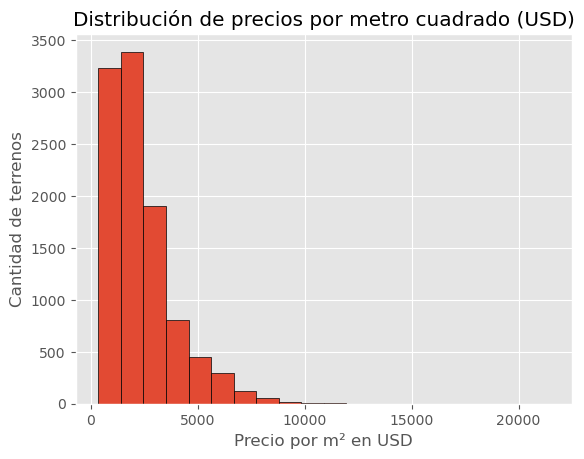

In [56]:
# hacer un histograma dfimport matplotlib.pyplot as plt

df["DOLARM2"].hist(bins=20, edgecolor='black')
plt.xlabel("Precio por m² en USD")
plt.ylabel("Cantidad de terrenos")
plt.title("Distribución de precios por metro cuadrado (USD)")
plt.show()


Vemos que el muestreo principal fue durante el segundo trimestre del año, por lo que el análisis trimestral puede ser complicado.

### Ejercicio 1.
#### ¿Cuál es el precio medio del metro cuadrado en la Ciudad de Buenos Aires?

In [57]:
# Calcular el promedio de la columna "DOLARM2"


# Imprimir el resultado
df["DOLARM2"].mean()


2357.6508106009123

### Ejercicio 2.
#### a) Dividir las propiedades por cuartiles de precios en dólares.

In [58]:
df["CUARTIL_PRECIOUSD"] = pd.qcut(df["PRECIOUSD"], q=4, labels=["Q1", "Q2", "Q3", "Q4"])

In [59]:
df["CUARTIL_PRECIOUSD"]

0        Q1
1        Q1
2        Q1
3        Q1
4        Q1
         ..
10296    Q2
10297    Q3
10298    Q3
10299    Q3
10300    Q2
Name: CUARTIL_PRECIOUSD, Length: 10301, dtype: category
Categories (4, object): ['Q1' < 'Q2' < 'Q3' < 'Q4']

#### b) ¿Cuáles son los barrios con más domicilios en venta dentro del cuartil más barato de CABA?

Usar pivot_table

In [66]:
# Calcular una tabla pivot que cuenta la cantidad de domicilios por barrio y cuartil
pivot = pd.pivot_table(
    df,
    index="BARRIO",
    columns="CUARTIL_PRECIOUSD",
    values="DIRECCION",  # o cualquier columna no nula por fila
    aggfunc="count",
    fill_value=0
)


# Seleccionar la columna correspondiente al cuartil más barato y ordenar de mayor a menor
pivot_sorted = pivot.sort_values(by="Q1", ascending=False)
# pivot_sorted.head(5)


# Imprimir los 5 barrios con más domicilios en venta en el cuartil más barato
print("Los 5 barrios con más domicilios en venta dentro del cuartil más barato son:")
print(pivot_sorted.head(5))

Los 5 barrios con más domicilios en venta dentro del cuartil más barato son:
CUARTIL_PRECIOUSD   Q1  Q2  Q3  Q4
BARRIO                            
MATADEROS          171  55  27  13
PARQUE PATRICIOS   119  51  43  28
NUEVA POMPEYA      114  16   2  38
SAN CRISTOBAL      104  85  43  27
BOCA               104  58  17  50


/var/folders/fy/60bqycgj6lv4hqpj9smr9f880000gn/T/ipykernel_97249/598974286.py:2: FutureWarning:

The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior



#### ¿Y usando groupby?

In [77]:
# Agrupar lo
df_agrupado = df.groupby(["BARRIO", "CUARTIL_PRECIOUSD"])["DIRECCION"].count().reset_index(name="CANTIDAD")

# Seleccionar los grupos correspondientes al cuartil más barato y ordenar de mayor a menor

df_q1 = df_agrupado[df_agrupado["CUARTIL_PRECIOUSD"] == "Q1"]
df_q1_sorted = df_q1.sort_values(by="CANTIDAD", ascending=False)
# Imprimir los 5 barrios con más domicilios en venta en el cuartil más barato
print("Los 5 barrios con más domicilios en venta dentro del cuartil más barato son:")
print(df_q1_sorted.head(5))

Los 5 barrios con más domicilios en venta dentro del cuartil más barato son:
               BARRIO CUARTIL_PRECIOUSD  CANTIDAD
72          MATADEROS                Q1       171
108  PARQUE PATRICIOS                Q1       119
84      NUEVA POMPEYA                Q1       114
132     SAN CRISTOBAL                Q1       104
24               BOCA                Q1       104


/var/folders/fy/60bqycgj6lv4hqpj9smr9f880000gn/T/ipykernel_97249/2857859814.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



#### ¿Hay otra forma más sencilla?

In [ ]:
#usando value counts / investiga

### Ejercicio 3.
#### ¿Se puede calcular el tamaño de las propiedades?

In [ ]:
# Calcular el tamaño de las propiedades en metros cuadrados
df = pd.read_csv("https://cdn.buenosaires.gob.ar/datosabiertos/datasets/secretaria-de-desarrollo-urbano/terrenos-valor-oferta/Terrenos-en-venta-2020.csv", encoding = "latin1", sep=",")
df


,DIRECCION,PROPIEDADS,PRECIOUSD,PRECIOPESO,DOLARM2,PESOSM2,COTIZACION,TRIMESTRE_,BARRIO,COMUNA_
0,RIVADAVIA 3500,190,150000,12000000,790,63158,80,CUARTO,ALMAGRO,5
1,PRINGLES 100,242,230000,18400000,950,76033,80,CUARTO,ALMAGRO,5
2,"PERON, JUAN DOMINGO, TTE. 3400",211,265000,21200000,1256,100474,80,CUARTO,ALMAGRO,5
3,MEXICO 4000,320,300000,24000000,938,75000,80,CUARTO,ALMAGRO,5
4,VENEZUELA 4067,250,305000,24400000,1220,97600,80,CUARTO,ALMAGRO,5
...,...,...,...,...,...,...,...,...,...,...
10296,"BONORINO, ESTEBAN, Cnel. 300",149,430000,27412500,2886,183976,64,PRIMER,FLORES NORTE,7
10297,RIVERA INDARTE 100,500,790000,50362500,1580,100725,64,PRIMER,FLORES NORTE,7
10298,"ALVAREZ, DONATO, Tte. Gral. 200",771,690000,43987500,895,57052,64,PRIMER,FLORES NORTE,7
10299,"ALBERDI, JUAN BAUTISTA 3100",409,800000,51000000,1956,124694,64,PRIMER,FLORES NORTE,7


In [ ]:
#imprime el df

#### ¿Cuál sería el precio promedio de las propiedades para cada decil, según metros cuadrados?

In [92]:
# Dividir los datos en deciles según el tamaño de las propiedades
import pandas as pd

df = pd.read_csv(
    "https://cdn.buenosaires.gob.ar/datosabiertos/datasets/secretaria-de-desarrollo-urbano/terrenos-valor-oferta/Terrenos-en-venta-2020.csv",
    encoding="latin1",
    sep=","
)

# Crear columna de deciles según PROPIEDADS
df["DECIL_M2"] = pd.qcut(
    df["PROPIEDADS"],
    q=10,
    labels=["D1", "D2", "D3", "D4", "D5", "D6", "D7", "D8", "D9", "D10"]
)

df

# Calcular el precio promedio por metro cuadrado para cada decil de tamaño

promedios = df.groupby("DECIL_M2")["DOLARM2"].mean()
print(promedios)

DECIL_M2
D1    3039.11423
D2    2639.53204
D3    2730.98658
D4    2429.31371
D5    2429.67389
D6    2207.49514
D7    2038.78058
D8    2070.75244
D9    2112.72104
D10   1869.24902
Name: DOLARM2, dtype: float64


/var/folders/fy/60bqycgj6lv4hqpj9smr9f880000gn/T/ipykernel_97249/1798015873.py:21: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [102]:
promedios = df.groupby("DECIL_M2")["DOLARM2"].mean()
precios_promedio_por_decil = promedios.reset_index()
precios_promedio_por_decil["decil"] = range(1, 11)
precios_promedio_por_decil


/var/folders/fy/60bqycgj6lv4hqpj9smr9f880000gn/T/ipykernel_97249/941749149.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



,DECIL_M2,DOLARM2,decil
0,D1,3039.11423,1
1,D2,2639.53204,2
2,D3,2730.98658,3
3,D4,2429.31371,4
4,D5,2429.67389,5
5,D6,2207.49514,6
6,D7,2038.78058,7
7,D8,2070.75244,8
8,D9,2112.72104,9
9,D10,1869.24902,10


In [ ]:
#precios_promedio_por_decil

#precios_promedio_por_decil.plot(x='decil', y='precio_prom_m2')


### Ejercicio 4.

#### ¿Cuáles son los barrios más caros en términos de precios por metro cuadrado? ¿Y los más baratos?


In [113]:
# Calcular el precio promedio por metro cuadrado en cada barrio
import pandas as pd

df = pd.read_csv(
    "https://cdn.buenosaires.gob.ar/datosabiertos/datasets/secretaria-de-desarrollo-urbano/terrenos-valor-oferta/Terrenos-en-venta-2020.csv",
    encoding="latin1",
    sep=","
)


# Ordenar los barrios por precio promedio de mayor a menor
promedios = df.groupby("BARRIO")["DOLARM2"].mean()

# promedios = promedios.sort_values(by="PRECIOUSD", ascending=False)

barrios_mas_caros = promedios.sort_values(ascending=False).head(10)

# Imprimir los barrios más caros
print("Los barrios más caros en términos de precios por metro cuadrado son:")
print(barrios_mas_caros.head())

# Imprimir los barrios más baratos
print("Los barrios más baratos en términos de precios por metro cuadrado son:")
print(barrios_mas_caros.tail())

Los barrios más caros en términos de precios por metro cuadrado son:
BARRIO
RECOLETA        5834.18750
RETIRO          5284.16667
PUERTO MADERO   4906.00000
BELGRANO        4302.16605
PALERMO         4283.04671
Name: DOLARM2, dtype: float64
Los barrios más baratos en términos de precios por metro cuadrado son:
BARRIO
NUÃEZ         3784.09744
SAN NICOLAS    3758.36232
COLEGIALES     3398.90090
VILLA CRESPO   3045.26913
COLGIALES      2900.00000
Name: DOLARM2, dtype: float64


### Ejercicio 5

#### Dado el siguiente DataFrame con departamentos en venta en CABA en 2019: https://data.buenosaires.gob.ar/dataset/terrenos-valor-oferta/resource/c9a6fed8-da1d-460e-92a8-e0213d68f59c

#### ¿Qué porcentaje de propiedades que estaban en venta durante 2019 siguieron estando en 2020?

In [2]:
df_2019 = pd.read_csv("https://cdn.buenosaires.gob.ar/datosabiertos/datasets/secretaria-de-desarrollo-urbano/terrenos-valor-oferta/Terrenos-en-venta-2019.csv")
df_2020 = pd.read_csv("https://cdn.buenosaires.gob.ar/datosabiertos/datasets/secretaria-de-desarrollo-urbano/terrenos-valor-oferta/Terrenos-en-venta-2020.csv", encoding = "latin1", sep=",")


In [128]:
df_2019["OPERACION"].value_counts()

OPERACION
VTA    5002
ALQ       4
Name: count, dtype: int64

In [116]:
df_2019 = df_2019[df_2019["OPERACION"]=="VTA"]

In [117]:
#hacer un head del df
df_2019.head()

,OPERACION,TIPO,LATITUD,LONGITUD,M2TOTAL,DIRECCION,CAMBIO,PRECIOUSD,PRECIOARS,PRECIOUSDM,PRECIOARSM,BARRIOS,COMUNA
0,VTA,TERRENO,-34.6294378,-58.4498948,235.00000,Malvinas Argentinas al 400,45.00,1100000.00000,49500000,4681.00000,210645.00000,CABALLITO,6
1,VTA,TERRENO,-34.6289663,-58.4483573,1629.00000,Jose Bonifacio 1520,45.00,1400000.00000,63000000,859.00000,38655.00000,CABALLITO,6
2,VTA,TERRENO,-34.6265344,-58.4326234,438.00000,BONIFACIO JOSE 400,45.00,2380000.00000,107100000,1062.00000,47790.00000,CABALLITO,6
3,VTA,TERRENO,-34.6248406,-58.4317985,272.00000,VIEL al 600,45.00,895000.00000,40275000,3290.00000,148050.00000,CABALLITO,6
4,VTA,TERRENO,-34.622629,-58.44079,600.00000,Av. Del Barco Centenera 200,45.00,400000.00000,18000000,667.00000,30015.00000,CABALLITO,6


Primer pantallazo del df.

In [ ]:
# Merge de los DataFrames usando la columna 'DIRECCION'

# Cálculo del porcentaje de propiedades que estaban en venta en 2019 y siguieron en 2020


In [10]:
casos_tests = df_2020.merge(
    df_2019,
    left_on=["DIRECCION"],
    right_on=["DIRECCION"]
)
casos_tests

,DIRECCION,PROPIEDADS,PRECIOUSD_x,PRECIOPESO,DOLARM2,PESOSM2,COTIZACION,TRIMESTRE_,BARRIO,COMUNA_,...,LATITUD,LONGITUD,M2TOTAL,CAMBIO,PRECIOUSD_y,PRECIOARS,PRECIOUSDM,PRECIOARSM,BARRIOS,COMUNA
0,DEAN FUNES 500,247,290000,23200000,1174,93927,80,CUARTO,BALVANERA,3,...,-346166812,-584068011,247.0,58.90,290000.0,17081000,1174.089069,68097.166002,BALVANERA,3
1,DEAN FUNES 500,249,310000,24800000,1245,99598,80,CUARTO,BALVANERA,3,...,-346166812,-584068011,247.0,58.90,290000.0,17081000,1174.089069,68097.166002,BALVANERA,3
2,DEAN FUNES 500,248,340000,27200000,1371,109677,80,CUARTO,BALVANERA,3,...,-346166812,-584068011,247.0,58.90,290000.0,17081000,1174.089069,68097.166002,BALVANERA,3
3,TRES SARGENTOS 300,476,1450000,116000000,3046,243698,80,CUARTO,RETIRO,1,...,-345896061,-583802473,1330.0,51.80,1450000.0,75110000,1090.000000,56462.000000,RETIRO,1
4,CESPEDES 3800,234,380000,30400000,1624,129914,80,CUARTO,CHACARITA,15,...,-34582708,-58456967,233.0,58.90,380000.0,22382000,1630.901288,94592.274704,CHACARITA,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2311,ANDALGALA 1000,800,380000,24225000,475,30281,64,TERCER,LINIERS,9,...,-346501958,-585222007,377.0,58.90,380000.0,22382000,1007.957560,58461.538480,LINIERS,9
2312,MONASTERIO 100,262,490000,31237500,1870,119227,64,TERCER,PARQUE PATRICIOS,4,...,-34636332,-58395764,262.0,60.38,690000.0,41662200,2634.000000,159041.000000,PARQUE PATRICIOS,4
2313,PATAGONES 2600,450,650000,41437500,1444,92083,64,TERCER,PARQUE PATRICIOS,4,...,-34.6371494,-58.3994156,450.0,"37,5",790000.0,29625000,1756.000000,65850.000000,PARQUE PATRICIOS,4
2314,GALICIA,128,240000,15360000,1875,120000,64,SEGUNDO,VILLA GRAL. MITRE,11,...,-346124697,-584643725,900.0,60.38,900000.0,54342000,1000.000000,60380.000000,VILLA GRAL. MITRE,11


#### Extra: ¿qué modificaciones habría que hacer para encontrar más coincidencias? ¿Qué consideraciones habría que tomar a la hora de analizar el resultado?

Podríamos estandarizar las direcciones:

In [16]:
# Eliminamos nulos

# Función para estandarizar las direcciones
def standardize_address(address):
    if pd.isnull(address):
        return address
    return address.strip().upper()


# Aplicar la función de estandarización a las direcciones en ambos DataFrames
df_2019['DIRECCION'] = df_2019['DIRECCION'].apply(standardize_address)
df_2020['DIRECCION'] = df_2020['DIRECCION'].apply(standardize_address)


In [21]:
# Merge de los DataFrames usando la columna 'DIRECCION'

casos_tests = df_2020.merge(
    df_2019,
    left_on=["DIRECCION"],
    right_on=["DIRECCION"]
)
# Crear conjuntos de direcciones estandarizadas
direcciones_2019 = set(df_2019["DIRECCION"].dropna())
direcciones_2020 = set(df_2020["DIRECCION"].dropna())

# Direcciones que aparecen en ambos años
direcciones_repetidas = direcciones_2019.intersection(direcciones_2020)

# Calcular el porcentaje de propiedades de 2019 que siguen en venta en 2020
porcentaje = len(direcciones_repetidas) / len(direcciones_2019) * 100

print(f"Porcentaje de propiedades que siguieron en venta en 2020: {porcentaje:.2f}%")




Porcentaje de propiedades que siguieron en venta en 2020: 20.97%


Podríamos eliminar duplicados con ```drop_duplicates()```. Este método lo vamos a ver más adelante, pero permite eliminar filas duplicadas. Por defecto elimina las que son en su totalidad iguales, pero utilizando el parámetro ```subset``` podemos seleccionar una columna (o varias) en particular que queremos utilizar como filtro

En este caso, queremos eliminar las filas con la dirección repetida.




In [22]:
print("Dataset original en 2019:")
print(df_2019.shape)
print("Filas repetidas en 2019:")
print(df_2019[df_2019.duplicated(subset="DIRECCION")].shape)

Dataset original en 2019:
(5006, 13)
Filas repetidas en 2019:
(1752, 13)


In [23]:
df_2019[df_2019.duplicated(subset="DIRECCION")]

,OPERACION,TIPO,LATITUD,LONGITUD,M2TOTAL,DIRECCION,CAMBIO,PRECIOUSD,PRECIOARS,PRECIOUSDM,PRECIOARSM,BARRIOS,COMUNA
177,VTA,TERRENO,-34.6166421,-58.4067744,251.0,DEAN FUNES AL 500,45.00,370000.0,16650000,1474.0,66330.0,BALVANERA,3
216,VTA,TERRENO,-34.6022826,-58.4402184,206.0,PADILLA AL 300,45.00,900000.0,40500000,4369.0,196605.0,VILLA CRESPO,15
218,VTA,TERRENO,-34.6022521,-58.4344461,208.0,VERA AL 100,45.00,800000.0,36000000,3846.0,173070.0,VILLA CRESPO,15
221,VTA,TERRENO,-34.602086476108,-58.446829554282,416.0,OLAYA AL 1600,45.00,500000.0,22500000,1202.0,54090.0,VILLA CRESPO,15
229,VTA,TERRENO,-34.5988758,-58.4335141,346.0,MUY BUEN LOTE INCIDENCIA MENOR A 600 DLS M2 J...,45.00,1350000.0,60750000,3902.0,175590.0,VILLA CRESPO,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4998,VTA,TERRENO,-34.6283595,-58.4570897,202.0,RAMON FALCON AL 1900,60.50,1550000.0,93775000,7673.0,464217.0,FLORES NORTE,7
5000,VTA,TERRENO,-34.6187647,-58.4669925,134.0,BUFANO ALFREDO R. AL 1000,60.50,349000.0,21114500,2604.0,157542.0,FLORES NORTE,7
5001,VTA,TERRENO,-34.6184882,-58.46834125,552.0,ARTIGAS AL 1000,60.50,850000.0,51425000,1540.0,93170.0,FLORES NORTE,7
5004,VTA,TERRENO,-34.621818,-58.473141,425.0,FLORES NAZCA Y PAEZ,60.50,1000000.0,60500000,2353.0,142357.0,FLORES NORTE,7


In [26]:
print("Dataset original en 2020:")
print(df_2020.shape)
print("Filas repetidas en 2020:")
print(df_2020[df_2020.duplicated(subset="DIRECCION")].shape)

Dataset original en 2020:
(10301, 10)
Filas repetidas en 2020:
(6855, 10)


In [28]:
df_2020[df_2020.duplicated(subset="DIRECCION")].sort_values(by="DIRECCION")

,DIRECCION,PROPIEDADS,PRECIOUSD,PRECIOPESO,DOLARM2,PESOSM2,COTIZACION,TRIMESTRE_,BARRIO,COMUNA_
6388,.ANDONAEGUI,364,450000,31275000,1236,85920,70,SEGUNDO,PARQUE CHAS,15
8054,.ANDONAEGUI,364,450000,30240000,1236,83077,67,SEGUNDO,PARQUE CHAS,15
6383,.CAMPILLO,364,500000,34750000,1374,95467,70,SEGUNDO,PARQUE CHAS,15
8055,.CAMPILLO,364,500000,33600000,1374,92308,67,SEGUNDO,PARQUE CHAS,15
9163,1 DE MAYO 1800,208,100000,6720000,481,32308,67,SEGUNDO,NUEVA POMPEYA,4
...,...,...,...,...,...,...,...,...,...,...
2976,NaN,1100,3500000,224000000,3182,203636,64,SEGUNDO,VILLA CRESPO,15
3017,NaN,1050,520000,33280000,495,31695,64,SEGUNDO,VILLA CRESPO,15
3981,NaN,221,420000,26880000,1900,121629,64,SEGUNDO,PARQUE PATRICIOS,4
3985,NaN,128,350000,22400000,2734,175000,64,SEGUNDO,PARQUE PATRICIOS,4


In [30]:
df_2019_sind = df_2019.drop_duplicates(subset="DIRECCION")
df_sind = df_2020.drop_duplicates(subset="DIRECCION")

In [ ]:
#print(df_2019_sind.shape)
#print(df_sind.shape)

(3252, 13)
(3445, 12)


In [31]:
df_2019_sind.shape

(3254, 13)

El porcentaje disminuye muchísimo. Otras opciones posibles son la de ampliar el horizonte de dropeo de duplicados (tomar no solo la dirección como subset sino también que sean propiedades que coincidan bastante en metros cuadrados) o Procesamientos de Lenguaje Natural (NLP) que permitan estandarizar aún más las direcciones (esto último excede al curso actual).

### Ejercicio 6
#### Agregar una columna al DataFrame ```df``` que indique si la propiedad se encuentra en un barrio del centro (BARRIO es San Nicolás, Monserrat o Retiro) o no.




In [34]:
casos_tests

barrios_centro = ["SAN NICOLAS", "MONSERRAT", "RETIRO"]

casos_tests["ES_CENTRO"] = casos_tests["BARRIO"].str.upper().isin(barrios_centro)

#### Crear una columna que muestre la diferencia entre el precio en dólares de cada propiedad y el promedio del barrio en el que se encuentra, para el año 2019.
Nota: investigar la función transform()

In [35]:
df_2019

,OPERACION,TIPO,LATITUD,LONGITUD,M2TOTAL,DIRECCION,CAMBIO,PRECIOUSD,PRECIOARS,PRECIOUSDM,PRECIOARSM,BARRIOS,COMUNA
0,VTA,TERRENO,-34.6294378,-58.4498948,235.0,MALVINAS ARGENTINAS AL 400,45.00,1100000.0,49500000,4681.0,210645.0,CABALLITO,6
1,VTA,TERRENO,-34.6289663,-58.4483573,1629.0,JOSE BONIFACIO 1520,45.00,1400000.0,63000000,859.0,38655.0,CABALLITO,6
2,VTA,TERRENO,-34.6265344,-58.4326234,438.0,BONIFACIO JOSE 400,45.00,2380000.0,107100000,1062.0,47790.0,CABALLITO,6
3,VTA,TERRENO,-34.6248406,-58.4317985,272.0,VIEL AL 600,45.00,895000.0,40275000,3290.0,148050.0,CABALLITO,6
4,VTA,TERRENO,-34.622629,-58.44079,600.0,AV. DEL BARCO CENTENERA 200,45.00,400000.0,18000000,667.0,30015.0,CABALLITO,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5001,VTA,TERRENO,-34.6184882,-58.46834125,552.0,ARTIGAS AL 1000,60.50,850000.0,51425000,1540.0,93170.0,FLORES NORTE,7
5002,VTA,TERRENO,-34.631988,-58.464822,223.0,ALBERDI 2600,60.50,580000.0,35090000,2601.0,157361.0,FLORES NORTE,7
5003,VTA,TERRENO,-34.626819,-58.4621,229.0,CARACAS 100,60.50,350000.0,21175000,1528.0,92444.0,FLORES NORTE,7
5004,VTA,TERRENO,-34.621818,-58.473141,425.0,FLORES NAZCA Y PAEZ,60.50,1000000.0,60500000,2353.0,142357.0,FLORES NORTE,7


In [39]:
df_2019["PROMEDIO_BARRIO"] = df_2019.groupby("BARRIOS")["PRECIOUSD"].transform("mean")
df_2019["DIF_PRECIO_BARRIO"] = df_2019["PRECIOUSD"] - df_2019["PROMEDIO_BARRIO"]


In [41]:
df_2019["DIRECCION"].value_counts()

DIRECCION
DARWIN AL 200                            27
RIO DE JANEIRO AL 1000                   21
OLAYA AL 1600                            18
CORRIENTES AL 6100                       16
LOYOLA AL 100                            16
                                         ..
PRESIDENTE JOSE EVARISTO URIBURU 1000     1
VIDAL AL 2900                             1
ZABALA AL 3600                            1
VALENTIN VIRASORO 1200                    1
CARACAS 100                               1
Name: count, Length: 3253, dtype: int64